[View in Colaboratory](https://colab.research.google.com/github/scubamut/backtests/blob/master/BACKTEST_ONE_STRATEGY_AT_A_TIME.ipynb)

# **BACKTEST ONE STRATEGY **

In [2]:
from __future__ import print_function
from IPython.utils.path import get_ipython_dir
print(get_ipython().profile_dir.location)

/content/.ipython/profile_default


# **INSTALL PACKAGES**

In [3]:
!pip install git+https://github.com/scubamut/fintools.git
!pip install cvxopt
!pip install pyfolio
!pip install ffn
!pip install itable

  Cloning https://github.com/scubamut/fintools.git to /tmp/pip-req-build-tl671r6r
  Running setup.py bdist_wheel for fintools ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-n6x6lqt3/wheels/31/8c/f2/b804e06272798f0f915e278c6e44fe46c927321835e506c256
Successfully built fintools


In [4]:
!pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-zgwq98h6
  Running setup.py bdist_wheel for pandas-datareader ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-hd14qqgc/wheels/5f/4c/e3/f9e4e92cb4498744a91d53d37b840fb1959c286bf660740040
Successfully built pandas-datareader


# **IMPORT**

In [0]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import itable
import ffn

from fintools.Parameters import Parameters
from fintools.set_start_end import set_start_end
from fintools.get_yahoo_prices import get_yahoo_prices
from fintools.compute_weights_RS_DM import compute_weights_RS_DM
from fintools.compute_weights_PMA import compute_weights_PMA
from fintools.endpoints import endpoints
from fintools.backtest import backtest
from fintools.monthly_return_table import monthly_return_table
from fintools.show_return_table import show_return_table

# **GET DATA**

In [0]:
# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until today.

# start_date = '1986-01-01'
start_date = '2000-01-01'
# end_date = '2016-12-31'
end_date = datetime.today().strftime('%Y-%m-%d')

In [0]:

portfolios = {
    'RS0001': { 'symbols': ['VCVSX','VWEHX','VFIIX','FGOVX','VWAHX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 2, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0002': {'symbols': ['MMHYX','FAGIX','VFIIX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,               
               'rs_lookback': 3, 'risk_lookback': 2, 'n_top': 1, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0003': {'symbols': ['MMHYX','FAGIX','VFIIX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 1, 'frequency': 'Q',
              'cash_proxy': 'CASHX', 'risk_free': 0},    
    'DM0001': {'symbols': ['VCVSX','VWINX','VWEHX','VGHCX','VUSTX','VFIIX','VWAHX','FGOVX','FFXSX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 3, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 'FFXSX'},
    'DM0002': {'symbols': ['VCVSX','VUSTX','VWEHX','VFIIX','VGHCX','FRESX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 5, 'frequency': 'M',
              'cash_proxy': 'VFIIX', 'risk_free': 'FFXSX'},
    'PMA001': {'symbols': ['VCVSX', 'VFIIX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,  
               'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.4],
              'cash_proxy': 'VUSTX'},
    'PMA002': {'symbols': ['VCVSX', 'VWINX', 'VWEHX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.2, 0.2],
              'cash_proxy': 'VUSTX'},
    'PMA003': {'symbols': ['VCVSX', 'FAGIX', 'VGHCX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'risk_lookback': 2, 'frequency': 'M', 'allocations': [1./3., 1./3., 1./3.],
              'cash_proxy': 'VUSTX'}
    }

# **CHOOSE PORTFOLIO AND RUN STRATEGY**

Strategy : DM0001
FIRST BUY DATE = 1986-12-31 00:00:00



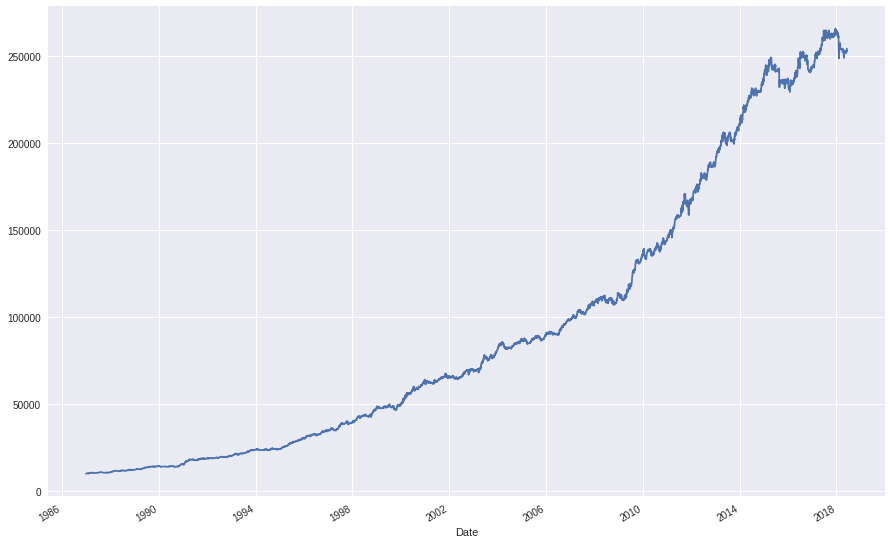

In [8]:
name = 'DM0001'

if 'PMA' in name :
    p_value, p_holdings, p_weights, prices =  compute_weights_PMA (name, portfolios[name])
else :
    p_value, p_holdings, p_weights, prices =  compute_weights_RS_DM (name, portfolios[name])
p_value.plot(figsize=(15, 10), grid=True)

# **PERFORMANCE STATISTICS**

In [9]:
ffn.calc_perf_stats(p_value).display()

Stats for None from 1986-12-31 00:00:00 - 2018-06-08 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
2440.32%            1.79  10.84%  -7.99%

Annualized Returns:
mtd    3m     6m      ytd     1y      3y     5y     10y    incep.
-----  -----  ------  ------  ------  -----  -----  -----  --------
0.67%  0.06%  -3.47%  -4.04%  -1.85%  1.62%  4.67%  8.64%  10.84%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.79     1.80       1.43
mean    10.46%   10.48%     10.89%
vol     5.85%    5.82%      7.60%
skew    -0.21    0.11       0.34
kurt    3.78     0.04       -0.25
best    2.26%    6.17%      27.31%
worst   -3.37%   -3.47%     -4.04%

Drawdowns:
max     avg       # days
------  ------  --------
-7.99%  -0.93%     19.99

Misc:
---------------  ------
avg. up month    1.78%
avg. down month  -0.93%
up year %        96.88%
12m up %         95.

# **MONTHLY RETURN TABLE**

In [10]:
def highlight_pos_neg (s) :
    is_positive = s > 0    
    return ['background-color : rgb(127,255,0)' if v else 'background-color : rgb(255,99,71)' for v in is_positive]

df = monthly_return_table (p_value)

df.style.\
    apply(highlight_pos_neg)

# **ANNUAL RETURNS - BAR PLOT**

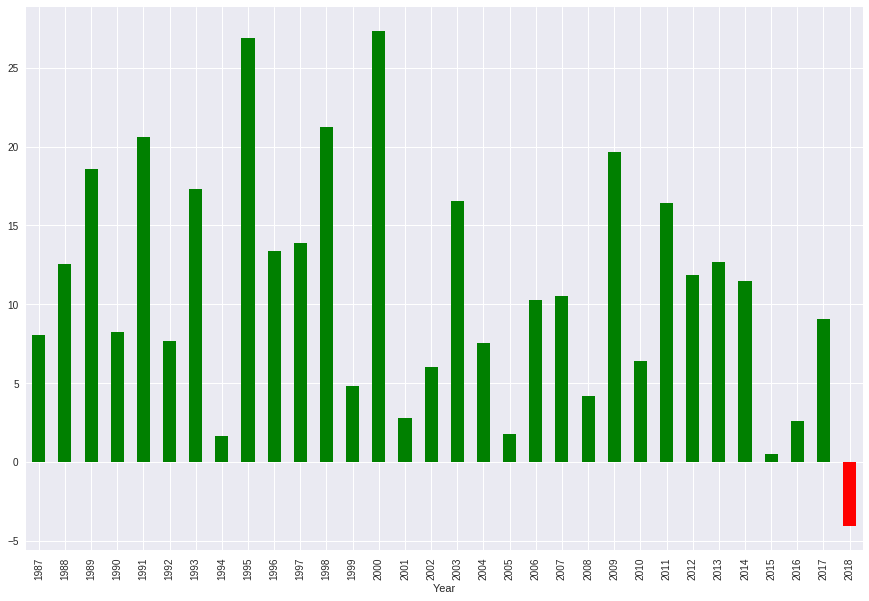

In [11]:

frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)